In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

LATENT_DEPTH = 100
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNEL = 3

In [43]:
loaded = tf.saved_model.load('/content/drive/MyDrive/Colab Notebooks/CGAN/EXP_1/cgan')
model = loaded.signatures["serving_default"]
print(model)

ConcreteFunction signature_wrapper(*, input_1, input_2)
  Args:
    input_1: float32 Tensor, shape=(None, 100)
    input_2: float32 Tensor, shape=(None, 1)
  Returns:
    {'discriminator': <1>, 'generator': <2>}
      <1>: float32 Tensor, shape=(None, 1)
      <2>: float32 Tensor, shape=(None, 100, 100, 3)


In [52]:
def generate_images(model, label, latent_depth):

    plt.figure(figsize=(15,10))

    for i in range(4):
        input_ = tf.random.normal([1, latent_depth])
        label_ = tf.fill((1, 1), label)
        images = model(input_1 = input_, input_2 = label_)['generator']
        
        image = images[0, :, :, :]
        image = np.reshape(image, [IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL])

        plt.subplot(1, 4, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Randomly Generated Images")

    plt.tight_layout()
    plt.show()

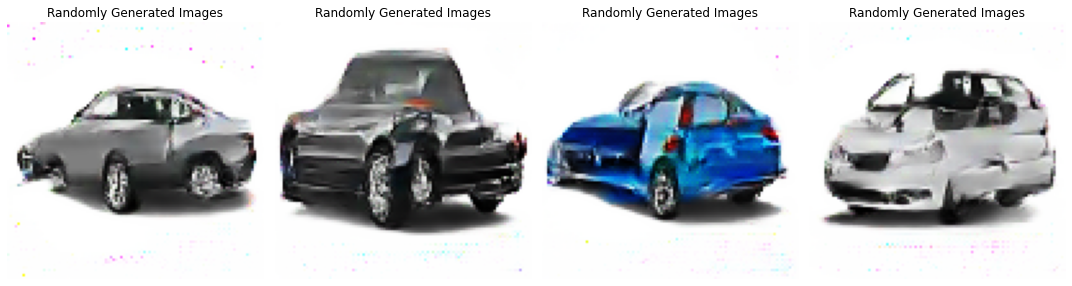

In [65]:
generate_images(model, 9.0, LATENT_DEPTH)